In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the citipy module to determine city based on latitude and longitude.
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
from citipy import citipy


# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


625

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | mayo
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | waddan
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | cayenne
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | mareeba
Processing Record 10 of Set 1 | pekan
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | evensk
Processing Record 18 of Set 1 | apatou
Processing Record 19 of Set 1 | sandnessjoen
Processing Record 20 of Set 1 | olafsvik
Processing Record 21 of Set 1 | havelock
Processing Record 22 of Set 1 | torbay
Processing Record 23 of Set 1 | lagoa
Proc

Processing Record 37 of Set 4 | cockburn town
Processing Record 38 of Set 4 | valdivia
Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | santa maria
Processing Record 41 of Set 4 | swan hill
Processing Record 42 of Set 4 | taiyuan
Processing Record 43 of Set 4 | klyuchi
Processing Record 44 of Set 4 | svetlaya
Processing Record 45 of Set 4 | adrar
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | burica
City not found. Skipping...
Processing Record 48 of Set 4 | joshimath
Processing Record 49 of Set 4 | toamasina
Processing Record 50 of Set 4 | zhanaozen
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | baoqing
Processing Record 4 of Set 5 | puerto escondido
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | ingraj bazar
Processing Record 7 of Set 5 | warrnambool
Processing Record 8 of Set 5 | aver

Processing Record 26 of Set 8 | sovetskaya
Processing Record 27 of Set 8 | katsuura
Processing Record 28 of Set 8 | izhma
Processing Record 29 of Set 8 | knysna
Processing Record 30 of Set 8 | akcaabat
Processing Record 31 of Set 8 | hualmay
Processing Record 32 of Set 8 | bilibino
Processing Record 33 of Set 8 | cururupu
Processing Record 34 of Set 8 | vestmanna
Processing Record 35 of Set 8 | sweetwater
Processing Record 36 of Set 8 | biloela
Processing Record 37 of Set 8 | pleshanovo
Processing Record 38 of Set 8 | dunedin
Processing Record 39 of Set 8 | port moresby
Processing Record 40 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 41 of Set 8 | senno
Processing Record 42 of Set 8 | yanan
City not found. Skipping...
Processing Record 43 of Set 8 | nishihara
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | san francisco
Processing Record 46 of Set 8 | jalalpur
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | be

Processing Record 13 of Set 12 | wanning
Processing Record 14 of Set 12 | uk
City not found. Skipping...
Processing Record 15 of Set 12 | kizema
Processing Record 16 of Set 12 | paita
Processing Record 17 of Set 12 | woodland
Processing Record 18 of Set 12 | porto novo
Processing Record 19 of Set 12 | bethel
Processing Record 20 of Set 12 | kuusamo
Processing Record 21 of Set 12 | buqayq
City not found. Skipping...
Processing Record 22 of Set 12 | saquena
Processing Record 23 of Set 12 | ambulu
Processing Record 24 of Set 12 | chegdomyn
Processing Record 25 of Set 12 | aripuana
Processing Record 26 of Set 12 | zaragoza
Processing Record 27 of Set 12 | kolda
Processing Record 28 of Set 12 | kharovsk
Processing Record 29 of Set 12 | veseloyarsk
Processing Record 30 of Set 12 | strezhevoy
Processing Record 31 of Set 12 | bustamante
Processing Record 32 of Set 12 | camopi
Processing Record 33 of Set 12 | yokote
Processing Record 34 of Set 12 | kayerkan
Processing Record 35 of Set 12 | broo

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Constitucion,-35.3333,-72.4167,64.42,73,31,8.59,CL,2022-02-02 22:25:14
1,Mayo,38.8876,-76.5119,49.55,76,0,3.44,US,2022-02-02 22:27:18
2,Rikitea,-23.1203,-134.9692,78.46,73,100,7.78,PF,2022-02-02 22:19:32
3,Waddan,29.1614,16.1390,48.04,58,20,11.07,LY,2022-02-02 22:24:34
4,San Cristobal,7.7669,-72.2250,78.98,30,19,5.64,VE,2022-02-02 22:24:44
5,Cayenne,4.9333,-52.3333,80.10,85,75,4.00,GF,2022-02-02 22:27:16
6,Ushuaia,-54.8000,-68.3000,44.26,57,75,25.32,AR,2022-02-02 22:24:00
7,Severo-Kurilsk,50.6789,156.1250,27.99,79,98,6.62,RU,2022-02-02 22:23:58
8,Mareeba,-17.0000,145.4333,81.48,96,100,5.37,AU,2022-02-02 22:27:19
9,Pekan,3.4836,103.3996,75.31,88,91,7.34,MY,2022-02-02 22:27:19


In [8]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Constitucion,CL,2022-02-02 22:25:14,-35.3333,-72.4167,64.42,73,31,8.59
1,Mayo,US,2022-02-02 22:27:18,38.8876,-76.5119,49.55,76,0,3.44
2,Rikitea,PF,2022-02-02 22:19:32,-23.1203,-134.9692,78.46,73,100,7.78
3,Waddan,LY,2022-02-02 22:24:34,29.1614,16.1390,48.04,58,20,11.07
4,San Cristobal,VE,2022-02-02 22:24:44,7.7669,-72.2250,78.98,30,19,5.64
5,Cayenne,GF,2022-02-02 22:27:16,4.9333,-52.3333,80.10,85,75,4.00
6,Ushuaia,AR,2022-02-02 22:24:00,-54.8000,-68.3000,44.26,57,75,25.32
7,Severo-Kurilsk,RU,2022-02-02 22:23:58,50.6789,156.1250,27.99,79,98,6.62
8,Mareeba,AU,2022-02-02 22:27:19,-17.0000,145.4333,81.48,96,100,5.37
9,Pekan,MY,2022-02-02 22:27:19,3.4836,103.3996,75.31,88,91,7.34


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

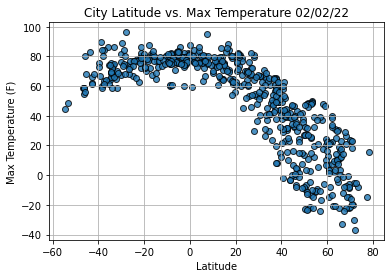

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

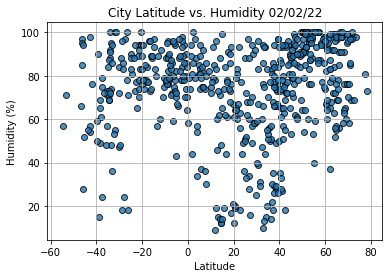

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

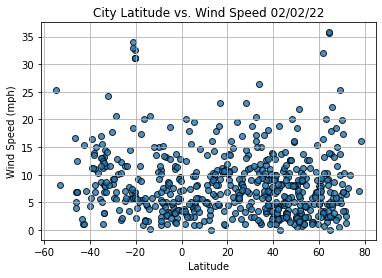

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


SyntaxError: unexpected EOF while parsing (706127405.py, line 3)

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]
index13

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                       "Max Temp",(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))


In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))


In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,70))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
                       "Wind Speed",(40,35))


In [ ]:
 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                       "Wind Speed",(-50,35))


In [ ]:
!pip install gmaps